# The Sampling Distribution & Central Limit Theorem (CLT)

A **Sampling Distribution** is the probability distribution of a specific statistic (like the mean, $\bar{x}$) obtained through repeated sampling of a specific population. It is the foundation of inferential statistics and hypothesis testing.

---

## 1. Key Formulas

When we sample from a population with mean $\mu$ and standard deviation $\sigma$:

### The Mean of the Sampling Distribution
The mean of the sample means is equal to the population mean:
$$\mu_{\bar{x}} = \mu$$

### The Standard Error (SE)
The standard deviation of the sampling distribution (Standard Error) decreases as the sample size $n$ increases:
$$SE = \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

### Z-Score for a Sample Mean
To find how many standard errors a sample mean is from the population mean:
$$Z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}$$

---

## 2. The Central Limit Theorem (CLT) Criteria
The CLT states that regardless of the population's distribution (skewed, uniform, etc.), the sampling distribution of the mean will become **Normal** if:
1. **Randomization:** Samples are selected randomly.
2. **Independence:** The 10% Rule (sample size $n$ should be less than 10% of the population).
3. **Large Sample Size:** Generally, $n \ge 30$ is considered sufficient for the distribution to be approximately Normal.

---

## 3. Data Science & ML Use Cases
* **Confidence Intervals:** Calculating the range where the true population parameter (like average user spend) likely lies.
* **Hypothesis Testing (P-values):** Determining if a change in a model's performance is statistically significant or just random noise.
* **Bootstrapping:** A resampling technique used to estimate the sampling distribution when the population distribution is unknown.
* **Model Validation:** Assessing the stability of a model by looking at the distribution of its performance metrics across different data folds.

---

## 4. Python Implementation: Visualizing CLT
Copy this code to see how a skewed population distribution results in a Normal sampling distribution.


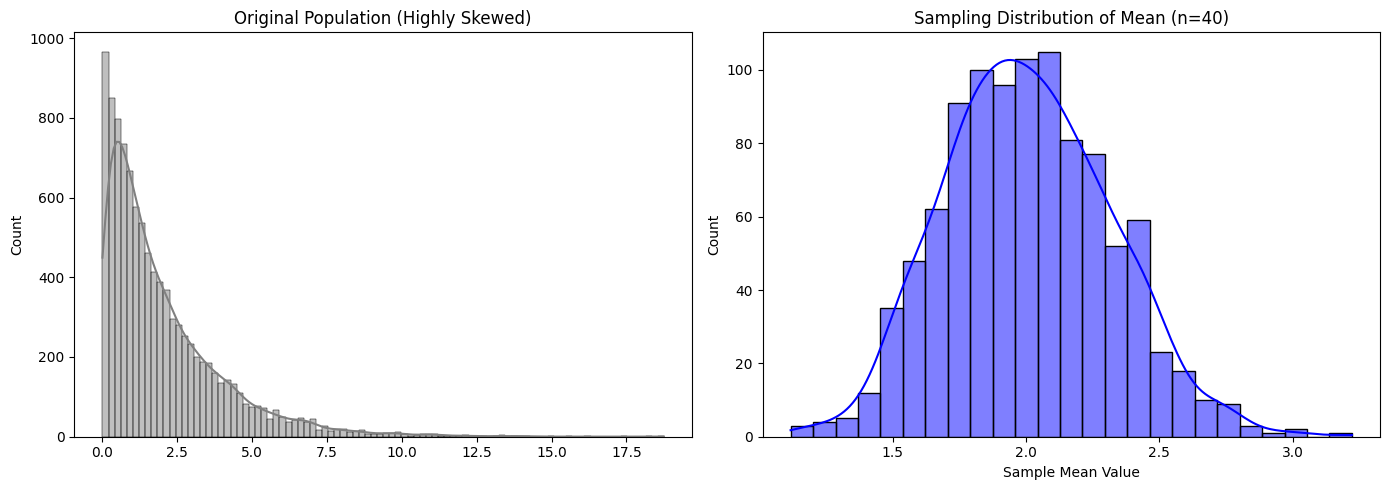

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a non-normal (skewed) population
population = np.random.exponential(scale=2, size=10000)

# 2. Take multiple samples and calculate their means
sample_size = 40
number_of_samples = 1000
sample_means = [np.random.choice(population, sample_size).mean() for _ in range(number_of_samples)]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Population Distribution
sns.histplot(population, kde=True, ax=ax[0], color='gray')
ax[0].set_title("Original Population (Highly Skewed)")

# Sampling Distribution
sns.histplot(sample_means, kde=True, ax=ax[1], color='blue')
ax[1].set_title(f"Sampling Distribution of Mean (n={sample_size})")
ax[1].set_xlabel("Sample Mean Value")

plt.tight_layout()
plt.show()

# Central Limit Theorem (CLT)

The **Central Limit Theorem** is the most fundamental pillar of modern statistics. It states that as the sample size $n$ increases, the **sampling distribution of the mean** will approach a Normal Distribution, regardless of the shape of the original population distribution.

---

## 1. The Core Formula
Given a population with mean $\mu$ and standard deviation $\sigma$, the distribution of the sample mean $\bar{x}$ for a sufficiently large sample size $n$ is:

$$\bar{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right)$$

* **Mean ($\mu_{\bar{x}}$):** $\mu$ (The center of the sample means is the population mean)
* **Standard Error ($SE$):** $\frac{\sigma}{\sqrt{n}}$ (The spread shrinks as $n$ grows)

---

## 2. The Four Conditions (BINS of CLT)
For the CLT to hold true, your sampling process must meet these criteria:
1. **Randomization:** The samples must be collected randomly.
2. **Independence:** Each observation must be independent of the others. 
3. **The 10% Rule:** If sampling without replacement, your sample size $n$ should not exceed 10% of the total population.
4. **Large Sample Condition:** Generally, **$n \ge 30$** is the rule of thumb. If the population is highly skewed, you may need a larger $n$.

---

## 3. Why is it a "Magic Trick" for Data Science?
* **Normality Assumption:** Most ML models (like Linear Regression) and tests (like T-Tests) assume normally distributed data. CLT allows us to apply these tools to non-normal real-world data by using sample means.
* **A/B Testing:** It allows us to calculate P-values and confidence intervals to see if a change in a website or product actually worked.
* **Polling & Census:** It explains why we can accurately predict an election outcome for millions of people by surveying only a few thousand.

---

## 4. Python Implementation: Seeing is Believing
The code below takes a highly skewed "Exponential" population and demonstrates how the sample means still form a perfect Bell Curve.



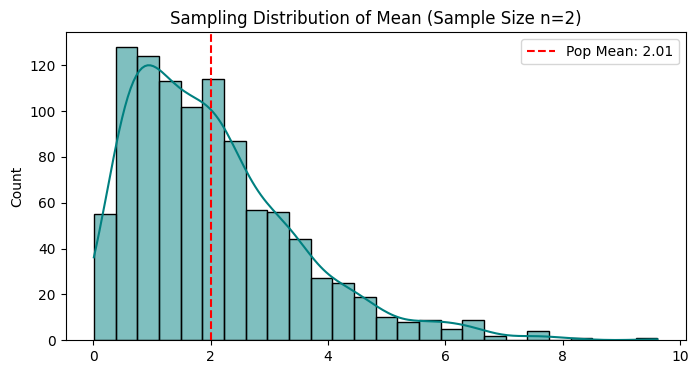

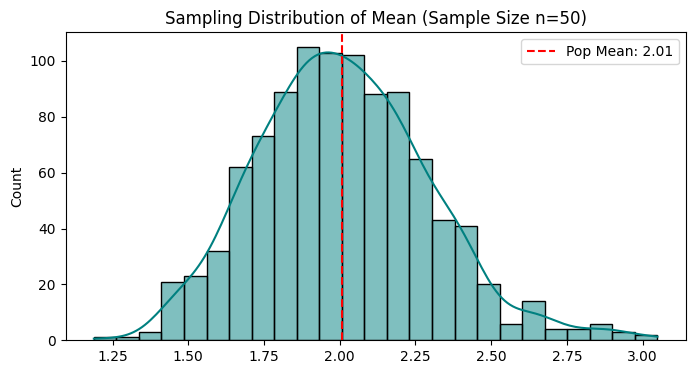

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a non-normal (Skewed) population
pop_size = 100000
population = np.random.exponential(scale=2, size=pop_size)

# 2. Function to simulate sampling distribution
def plot_clt(sample_size, n_samples=1000):
    sample_means = [np.random.choice(population, sample_size).mean() for _ in range(n_samples)]
    
    plt.figure(figsize=(8, 4))
    sns.histplot(sample_means, kde=True, color='teal')
    plt.title(f"Sampling Distribution of Mean (Sample Size n={sample_size})")
    plt.axvline(np.mean(population), color='red', linestyle='--', label=f'Pop Mean: {np.mean(population):.2f}')
    plt.legend()
    plt.show()

# Visualize with small and large n
plot_clt(sample_size=2)   # Still skewed
plot_clt(sample_size=50)  # Becomes Normal!



##  How to Find the Sampling Parameters
To perform calculations using the CLT, follow these three steps:

### Step 1: Find the Mean ($\mu_{\bar{x}}$)
The mean of your sampling distribution is always equal to the population mean.
$$\mu_{\bar{x}} = \mu$$

### Step 2: Calculate the Standard Error ($SE$)
This measures how much the sample mean is expected to vary from the true population mean. It is found by dividing the population standard deviation by the square root of the sample size.
$$SE = \frac{\sigma}{\sqrt{n}}$$

### Step 3: Find the Z-Score (The Distance)
To find the probability of a specific sample mean occurring, convert it to a Z-score. This tells you how many standard errors the sample mean is from the population mean.
$$Z = \frac{\bar{x} - \mu}{SE}$$


## 4. Python Implementation: Step-by-Step Calculation
Copy this code to see how to calculate these parameters and visualize the resulting Normal curve.


Standard Error: 2.1213
Z-Score for 105: 2.3570


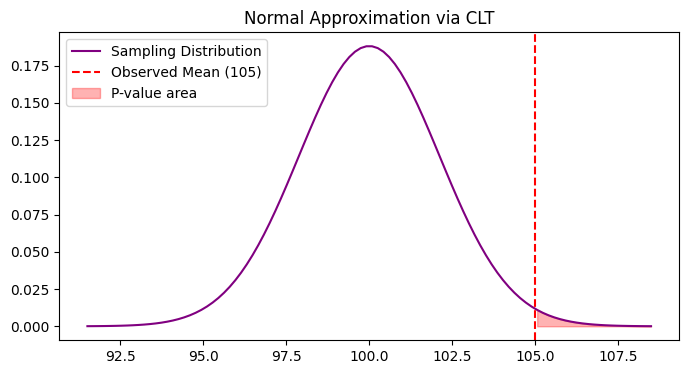

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Given Population Parameters
pop_mean = 100
pop_std = 15
n = 50       # Sample size
sample_mean_observed = 105

# 2. Finding Sampling Distribution Parameters
sampling_mean = pop_mean
standard_error = pop_std / np.sqrt(n)
z_score = (sample_mean_observed - sampling_mean) / standard_error

print(f"Standard Error: {standard_error:.4f}")
print(f"Z-Score for {sample_mean_observed}: {z_score:.4f}")

# 3. Visualization
x = np.linspace(sampling_mean - 4*standard_error, sampling_mean + 4*standard_error, 100)
y = norm.pdf(x, sampling_mean, standard_error)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Sampling Distribution', color='purple')
plt.axvline(sample_mean_observed, color='red', linestyle='--', label=f'Observed Mean ({sample_mean_observed})')
plt.fill_between(x, y, where=(x >= sample_mean_observed), color='red', alpha=0.3, label='P-value area')
plt.title("Normal Approximation via CLT")
plt.legend()
plt.show()


### Pro Tip for your Notebook:
The "Magic" of CLT is that you don't need to know the population's distribution. As long as you have a large enough sample, you can use **Normal Distribution** math (Z-scores, 68-95-99.7 rule) to make predictions.


The most common mistake is using the **Standard Deviation** ($\sigma$) instead of the **Standard Error** ($SE$) when calculating Z-scores for means. Always remember to divide by $\sqrt{n}$!